Давыдов ПИм-231 лаба 0_1

В прилагаемом файле дано описание предметной области. Файл с данными также прилагается. Ваша задача - построить модель, предсказывающую разновидность семян с точностью не менее 99%. Для этого выполните построение моделей на основе изученных ранее методов классификации, сравните результаты предсказаний. Попробуйте выполнить ансамблирование методов. Для каждой модели получите confusion matrix. Обратите внимание на выбросы (проведите разведочный анализ данных, постройте диаграмму "ящик с усами"), т.к. в данных о семенах содержатся примеси

**Как лично я понимаю это задание:**
- Читаем файл
- Чистим от разных ненужных вещей
- **Определяем выбросы** (поскольку у нас изначально датасет может содержать информацию о примесях различных предметов, но при этом они были определены фотосепаратором как принадлежащие одному из классов):
  - Строим ящики с усами для каждого столбца
  - Смотрим на количество выбросов
  - Делаем так, чтобы каждый выброс на диаграмме пометился как 'выброс' в целевом столбце (иначе говоря заводим 5ый класс "семян" для выбросов).
- Обучаем модели, смотрим результаты, применяем различные методы
- Производим скалирование данных и повторяем пункт выше

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

**Для начала проводим "разведочный анализ" и чистим датасет от всякого**

In [ ]:
df = pd.read_csv("Train.csv")
df

,Area,MajorAxisLenght,MinorAxisLenght,Eccentricity,Orientation,ConvexArea,FilledArea,EulerNumber,EquivDiameter,Solidity,Extent,Perimeter,Class
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,311.0,45.6957,8.7998,0.9813,-5.7814,334.0,311.0,1.0,19.8992,0.9311,0.7068,91.525,wheat
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1690.0,69.0800,32.8673,0.8796,-15.6711,1727.0,1701.0,-7.0,46.3872,0.9786,0.7207,166.371,sunflowerSeeds
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,693.0,50.9927,17.4658,0.9395,-2.0555,720.0,693.0,1.0,29.7045,0.9625,0.7549,111.994,peas
426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,370.0,52.2731,9.1246,0.9846,-1.5970,388.0,370.0,1.0,21.7048,0.9536,0.8061,103.930,wheat
428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna()
df

,Area,MajorAxisLenght,MinorAxisLenght,Eccentricity,Orientation,ConvexArea,FilledArea,EulerNumber,EquivDiameter,Solidity,Extent,Perimeter,Class
1,311.0,45.6957,8.7998,0.9813,-5.7814,334.0,311.0,1.0,19.8992,0.9311,0.7068,91.525,wheat
3,1690.0,69.0800,32.8673,0.8796,-15.6711,1727.0,1701.0,-7.0,46.3872,0.9786,0.7207,166.371,sunflowerSeeds
5,694.0,50.5956,17.5203,0.9381,1.7647,710.0,694.0,1.0,29.7259,0.9775,0.8165,109.720,peas
7,1752.0,135.4313,16.8499,0.9922,5.7401,1884.0,1761.0,-1.0,47.2305,0.9299,0.5771,276.205,sunflowerSeeds
9,314.0,48.1810,8.3713,0.9848,1.2984,329.0,314.0,1.0,19.9949,0.9544,0.8177,96.545,wheat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,670.0,49.6982,17.2118,0.9381,1.3465,690.0,670.0,1.0,29.2074,0.9710,0.8043,108.231,peas
423,363.0,47.3902,9.8685,0.9781,6.8201,394.0,363.0,1.0,21.4985,0.9213,0.6576,96.512,wheat
425,693.0,50.9927,17.4658,0.9395,-2.0555,720.0,693.0,1.0,29.7045,0.9625,0.7549,111.994,peas
427,370.0,52.2731,9.1246,0.9846,-1.5970,388.0,370.0,1.0,21.7048,0.9536,0.8061,103.930,wheat


In [ ]:
df = df.reset_index()
df

,index,Area,MajorAxisLenght,MinorAxisLenght,Eccentricity,Orientation,ConvexArea,FilledArea,EulerNumber,EquivDiameter,Solidity,Extent,Perimeter,Class
0,1,311.0,45.6957,8.7998,0.9813,-5.7814,334.0,311.0,1.0,19.8992,0.9311,0.7068,91.525,wheat
1,3,1690.0,69.0800,32.8673,0.8796,-15.6711,1727.0,1701.0,-7.0,46.3872,0.9786,0.7207,166.371,sunflowerSeeds
2,5,694.0,50.5956,17.5203,0.9381,1.7647,710.0,694.0,1.0,29.7259,0.9775,0.8165,109.720,peas
3,7,1752.0,135.4313,16.8499,0.9922,5.7401,1884.0,1761.0,-1.0,47.2305,0.9299,0.5771,276.205,sunflowerSeeds
4,9,314.0,48.1810,8.3713,0.9848,1.2984,329.0,314.0,1.0,19.9949,0.9544,0.8177,96.545,wheat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,421,670.0,49.6982,17.2118,0.9381,1.3465,690.0,670.0,1.0,29.2074,0.9710,0.8043,108.231,peas
211,423,363.0,47.3902,9.8685,0.9781,6.8201,394.0,363.0,1.0,21.4985,0.9213,0.6576,96.512,wheat
212,425,693.0,50.9927,17.4658,0.9395,-2.0555,720.0,693.0,1.0,29.7045,0.9625,0.7549,111.994,peas
213,427,370.0,52.2731,9.1246,0.9846,-1.5970,388.0,370.0,1.0,21.7048,0.9536,0.8061,103.930,wheat


In [ ]:
del df['index']
df

,Area,MajorAxisLenght,MinorAxisLenght,Eccentricity,Orientation,ConvexArea,FilledArea,EulerNumber,EquivDiameter,Solidity,Extent,Perimeter,Class
0,311.0,45.6957,8.7998,0.9813,-5.7814,334.0,311.0,1.0,19.8992,0.9311,0.7068,91.525,wheat
1,1690.0,69.0800,32.8673,0.8796,-15.6711,1727.0,1701.0,-7.0,46.3872,0.9786,0.7207,166.371,sunflowerSeeds
2,694.0,50.5956,17.5203,0.9381,1.7647,710.0,694.0,1.0,29.7259,0.9775,0.8165,109.720,peas
3,1752.0,135.4313,16.8499,0.9922,5.7401,1884.0,1761.0,-1.0,47.2305,0.9299,0.5771,276.205,sunflowerSeeds
4,314.0,48.1810,8.3713,0.9848,1.2984,329.0,314.0,1.0,19.9949,0.9544,0.8177,96.545,wheat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,670.0,49.6982,17.2118,0.9381,1.3465,690.0,670.0,1.0,29.2074,0.9710,0.8043,108.231,peas
211,363.0,47.3902,9.8685,0.9781,6.8201,394.0,363.0,1.0,21.4985,0.9213,0.6576,96.512,wheat
212,693.0,50.9927,17.4658,0.9395,-2.0555,720.0,693.0,1.0,29.7045,0.9625,0.7549,111.994,peas
213,370.0,52.2731,9.1246,0.9846,-1.5970,388.0,370.0,1.0,21.7048,0.9536,0.8061,103.930,wheat


Строим матрицу корреляции столбцов.

<ipython-input-72-6e0f0b323138>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


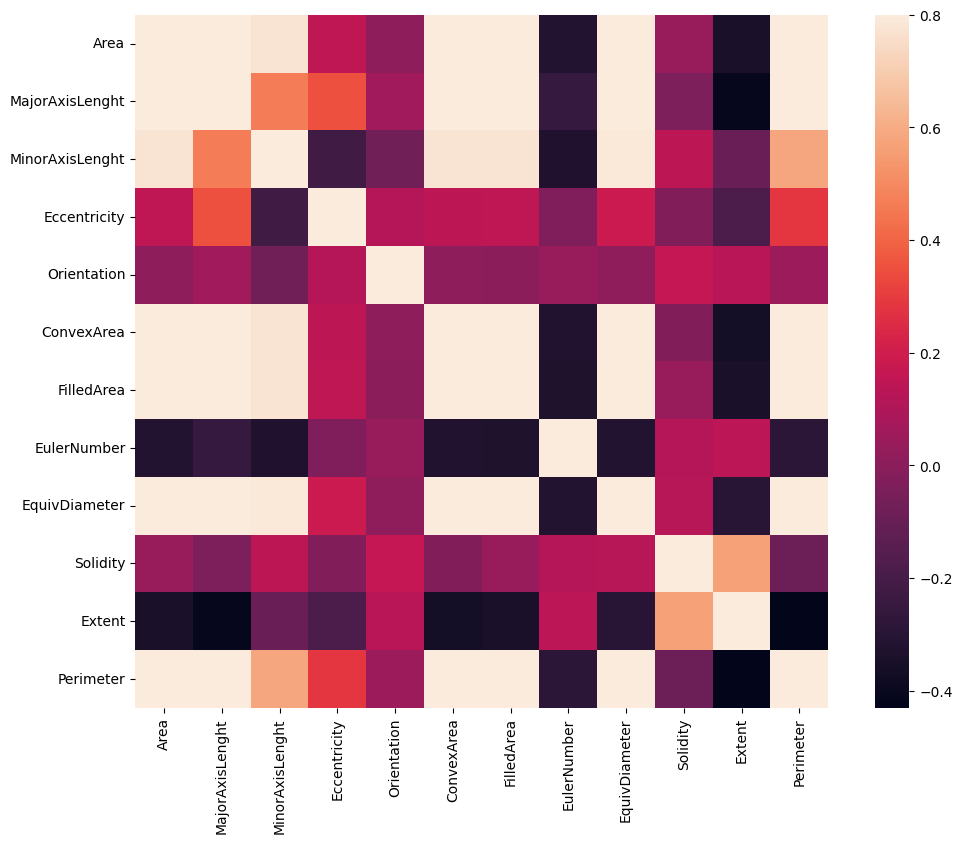

In [ ]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax = .8, square = True, ax = ax)
plt.show()

Многие столбцы коррелируют между собой, поэтому попробую просто загнать это всё в метод, чтобы оценить первичные результаты.

In [ ]:
df

,Area,MajorAxisLenght,MinorAxisLenght,Eccentricity,Orientation,ConvexArea,FilledArea,EulerNumber,EquivDiameter,Solidity,Extent,Perimeter,Class
0,311.0,45.6957,8.7998,0.9813,-5.7814,334.0,311.0,1.0,19.8992,0.9311,0.7068,91.525,wheat
1,1690.0,69.0800,32.8673,0.8796,-15.6711,1727.0,1701.0,-7.0,46.3872,0.9786,0.7207,166.371,sunflowerSeeds
2,694.0,50.5956,17.5203,0.9381,1.7647,710.0,694.0,1.0,29.7259,0.9775,0.8165,109.720,peas
3,1752.0,135.4313,16.8499,0.9922,5.7401,1884.0,1761.0,-1.0,47.2305,0.9299,0.5771,276.205,sunflowerSeeds
4,314.0,48.1810,8.3713,0.9848,1.2984,329.0,314.0,1.0,19.9949,0.9544,0.8177,96.545,wheat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,670.0,49.6982,17.2118,0.9381,1.3465,690.0,670.0,1.0,29.2074,0.9710,0.8043,108.231,peas
211,363.0,47.3902,9.8685,0.9781,6.8201,394.0,363.0,1.0,21.4985,0.9213,0.6576,96.512,wheat
212,693.0,50.9927,17.4658,0.9395,-2.0555,720.0,693.0,1.0,29.7045,0.9625,0.7549,111.994,peas
213,370.0,52.2731,9.1246,0.9846,-1.5970,388.0,370.0,1.0,21.7048,0.9536,0.8061,103.930,wheat


**Определяем выбросы и делаем из них новый класс**

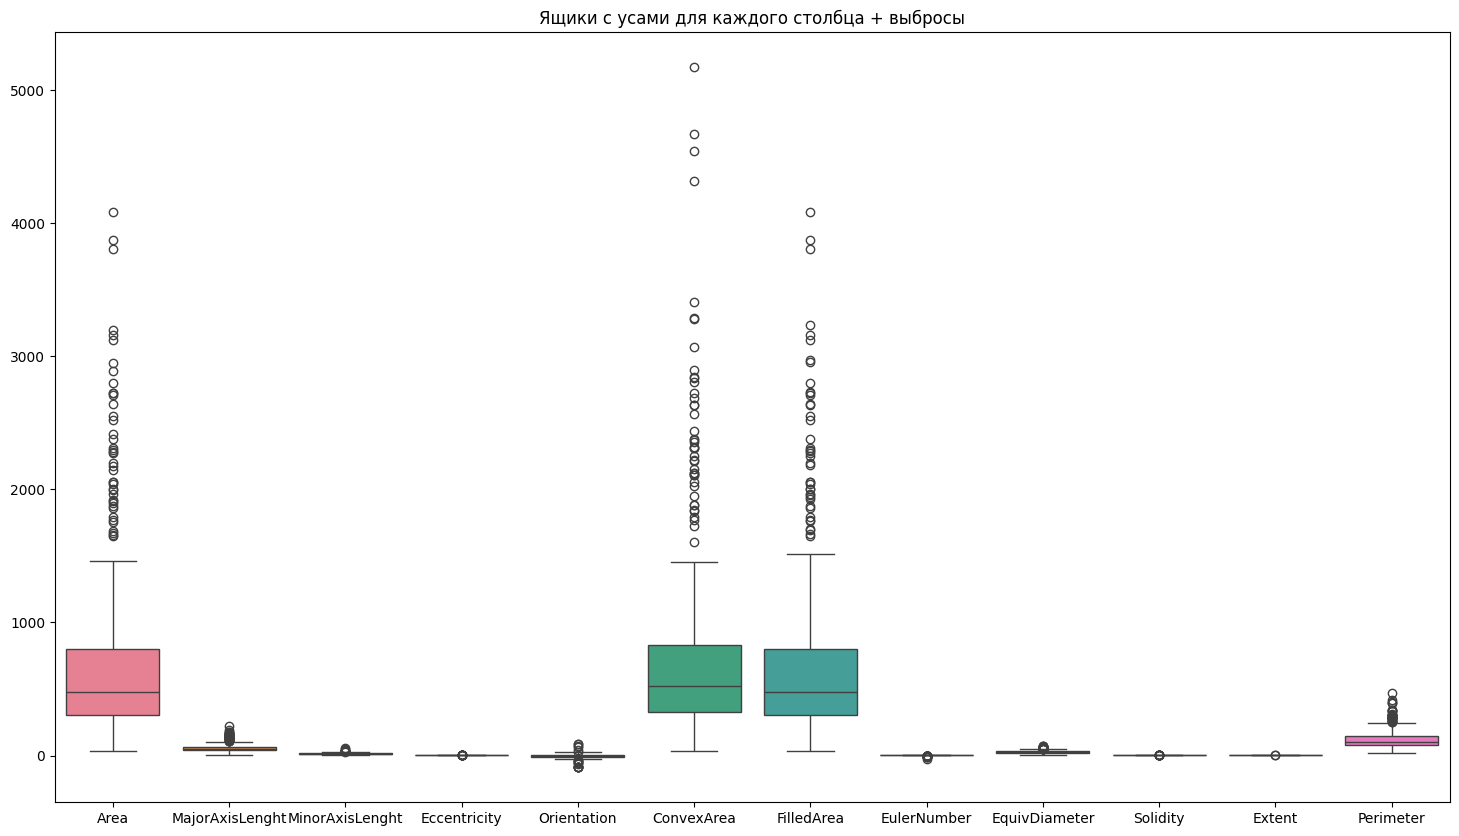

Общее количество выбросов в целевом столбце: 104



,Area,MajorAxisLenght,MinorAxisLenght,Eccentricity,Orientation,ConvexArea,FilledArea,EulerNumber,EquivDiameter,Solidity,Extent,Perimeter,Class
0,311.0,45.6957,8.7998,0.9813,-5.7814,334.0,311.0,1.0,19.8992,0.9311,0.7068,91.525,wheat
1,1690.0,69.0800,32.8673,0.8796,-15.6711,1727.0,1701.0,-7.0,46.3872,0.9786,0.7207,166.371,выброс
2,694.0,50.5956,17.5203,0.9381,1.7647,710.0,694.0,1.0,29.7259,0.9775,0.8165,109.720,peas
3,1752.0,135.4313,16.8499,0.9922,5.7401,1884.0,1761.0,-1.0,47.2305,0.9299,0.5771,276.205,выброс
4,314.0,48.1810,8.3713,0.9848,1.2984,329.0,314.0,1.0,19.9949,0.9544,0.8177,96.545,wheat
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,670.0,49.6982,17.2118,0.9381,1.3465,690.0,670.0,1.0,29.2074,0.9710,0.8043,108.231,peas
211,363.0,47.3902,9.8685,0.9781,6.8201,394.0,363.0,1.0,21.4985,0.9213,0.6576,96.512,wheat
212,693.0,50.9927,17.4658,0.9395,-2.0555,720.0,693.0,1.0,29.7045,0.9625,0.7549,111.994,peas
213,370.0,52.2731,9.1246,0.9846,-1.5970,388.0,370.0,1.0,21.7048,0.9536,0.8061,103.930,wheat


In [ ]:
numeric_features = df.select_dtypes(include=['float64']).columns
for feature in numeric_features:
    # вспоминаем, как строить ящики с усами и считаем, что у нас является выбросом
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # отмечаем строки с выбросами в целевом столбце
    outliers = (df[feature] < lower_bound) | (df[feature] > upper_bound)
    df.loc[outliers, 'Class'] = 'выброс'

# диаграммы ящика с усами с отметкой выбросов
plt.figure(figsize=(18, 10))
sns.boxplot(data=df.drop('Class', axis=1))
plt.title("Ящики с усами для каждого столбца + выбросы")
plt.show()

outliers_in_target = df[df['Class'] == 'выброс'].shape[0]
print(f"Общее количество выбросов в целевом столбце: {outliers_in_target}\n")
df

In [ ]:
df['Class'].value_counts()

выброс            104
wheat              45
peas               42
barley             19
sunflowerSeeds      5
Name: Class, dtype: int64

Поменял названия семечек на циферки.

**Далее определяем X и y, и разделяем данные на тестовую и тренировочную части**

In [ ]:
y = df['Class'].replace({'sunflowerSeeds': 0, 'peas': 1, 'barley': 2, 'wheat': 3, 'выброс': 4})
y

0      3
1      4
2      1
3      4
4      3
      ..
210    1
211    3
212    1
213    3
214    4
Name: Class, Length: 215, dtype: int64

In [ ]:
X = df.drop('Class', axis=1)
X

,Area,MajorAxisLenght,MinorAxisLenght,Eccentricity,Orientation,ConvexArea,FilledArea,EulerNumber,EquivDiameter,Solidity,Extent,Perimeter
0,311.0,45.6957,8.7998,0.9813,-5.7814,334.0,311.0,1.0,19.8992,0.9311,0.7068,91.525
1,1690.0,69.0800,32.8673,0.8796,-15.6711,1727.0,1701.0,-7.0,46.3872,0.9786,0.7207,166.371
2,694.0,50.5956,17.5203,0.9381,1.7647,710.0,694.0,1.0,29.7259,0.9775,0.8165,109.720
3,1752.0,135.4313,16.8499,0.9922,5.7401,1884.0,1761.0,-1.0,47.2305,0.9299,0.5771,276.205
4,314.0,48.1810,8.3713,0.9848,1.2984,329.0,314.0,1.0,19.9949,0.9544,0.8177,96.545
...,...,...,...,...,...,...,...,...,...,...,...,...
210,670.0,49.6982,17.2118,0.9381,1.3465,690.0,670.0,1.0,29.2074,0.9710,0.8043,108.231
211,363.0,47.3902,9.8685,0.9781,6.8201,394.0,363.0,1.0,21.4985,0.9213,0.6576,96.512
212,693.0,50.9927,17.4658,0.9395,-2.0555,720.0,693.0,1.0,29.7045,0.9625,0.7549,111.994
213,370.0,52.2731,9.1246,0.9846,-1.5970,388.0,370.0,1.0,21.7048,0.9536,0.8061,103.930


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Пробуем методы (сначала обычные, без подбора параметров)**

In [ ]:
knn = KNeighborsClassifier() #метод ближ. соседей
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.76      1.00      0.86        16
           2       0.50      0.60      0.55         5
           3       0.67      0.91      0.77        11
           4       0.87      0.62      0.73        32

    accuracy                           0.75        65
   macro avg       0.56      0.63      0.58        65
weighted avg       0.77      0.75      0.74        65



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
svm = SVC(kernel = 'linear') #метод опорных векторов, линейный
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
print(report)
print("\n")
print(matrix)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.94      1.00      0.97        16
           2       0.60      0.60      0.60         5
           3       0.85      1.00      0.92        11
           4       0.96      0.78      0.86        32

    accuracy                           0.85        65
   macro avg       0.67      0.68      0.67        65
weighted avg       0.89      0.85      0.86        65



[[ 0  1  0  0  0]
 [ 0 16  0  0  0]
 [ 0  0  3  1  1]
 [ 0  0  0 11  0]
 [ 4  0  2  1 25]]


In [ ]:
svm_rbf = SVC(kernel = 'rbf') #метод опорных векторов, rbf
svm_rbf.fit(X_train, y_train)
y_pred = svm_rbf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00        11
           4       0.49      1.00      0.66        32

    accuracy                           0.49        65
   macro avg       0.10      0.20      0.13        65
weighted avg       0.24      0.49      0.32        65



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_tree = DecisionTreeClassifier() #метод решающих деревьев
model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.94      1.00      0.97        16
           2       0.67      0.80      0.73         5
           3       1.00      0.91      0.95        11
           4       0.97      0.91      0.94        32

    accuracy                           0.91        65
   macro avg       0.71      0.72      0.72        65
weighted avg       0.93      0.91      0.92        65



In [ ]:
log_reg = LogisticRegression(max_iter=100000) #логистическая регрессия
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00        16
           2       0.75      0.60      0.67         5
           3       0.79      1.00      0.88        11
           4       0.94      0.91      0.92        32

    accuracy                           0.91        65
   macro avg       0.69      0.70      0.69        65
weighted avg       0.90      0.91      0.90        65



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Делаем скалирование признаков и подбираем гиперпараметры с помощью GridSearchCV**

**Метод ближ. соседей**

In [ ]:
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 10, 15, 20, 30],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Наилучшие параметры:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Наилучшие параметры: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, p=1, weights='distance') #метод ближ. соседей
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.84      1.00      0.91        16
           2       0.75      0.60      0.67         5
           3       0.69      1.00      0.81        11
           4       0.88      0.72      0.79        32

    accuracy                           0.82        65
   macro avg       0.63      0.66      0.64        65
weighted avg       0.82      0.82      0.80        65



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**SVM Linear**

In [ ]:
param_grid_svm_linear = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear']
}
grid_search_svm_linear = GridSearchCV(svm, param_grid_svm_linear, cv=5, scoring='accuracy')
grid_search_svm_linear.fit(X_train, y_train)

print("Наилучшие параметры SVM с линейным ядром:", grid_search_svm_linear.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Наилучшие параметры SVM с линейным ядром: {'C': 10, 'kernel': 'linear'}


In [ ]:
svm = SVC(kernel = 'linear', C = 10) #метод опорных векторов, линейный
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.94      1.00      0.97        16
           2       0.50      0.40      0.44         5
           3       0.85      1.00      0.92        11
           4       0.93      0.84      0.89        32

    accuracy                           0.86        65
   macro avg       0.64      0.65      0.64        65
weighted avg       0.87      0.86      0.86        65



SVM RBF не имеет смысла подбирать поскольку он дал лишь 49% точности.

**Дерево решений**

In [ ]:
param_grid_decision_tree = {
    'max_depth': [None, 2, 3, 4, 5, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_decision_tree = GridSearchCV(model_tree, param_grid_decision_tree, cv=5, scoring='accuracy')
grid_search_decision_tree.fit(X_train, y_train)

print("Наилучшие параметры решающего дерева:", grid_search_decision_tree.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Наилучшие параметры решающего дерева: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
model_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2) #метод решающих деревьев
model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00        16
           2       0.33      0.20      0.25         5
           3       0.75      0.82      0.78        11
           4       0.81      0.81      0.81        32

    accuracy                           0.80        65
   macro avg       0.58      0.57      0.57        65
weighted avg       0.80      0.80      0.80        65



Теперь, после подбора параметров, стандартизуем данные:

In [ ]:
# Стандартизация
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

Подберем гиперпараметры для линейной регрессии на стандратизированных данных, так как на обычных он ругался.

In [ ]:
param_grid_logistic_regression = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search_logistic_regression = GridSearchCV(log_reg, param_grid_logistic_regression, cv=5, scoring='accuracy')
grid_search_logistic_regression.fit(X_train_standardized, y_train)

print("Наилучшие параметры логистической регрессии:", grid_search_logistic_regression.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Наилучшие параметры логистической регрессии: {'C': 100, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [ ]:
log_reg = LogisticRegression(C = 100, max_iter=1000) #логистическая регрессия
log_reg.fit(X_train_standardized, y_train)
y_pred = log_reg.predict(X_test_standardized)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.94      1.00      0.97        16
           2       0.75      0.60      0.67         5
           3       1.00      1.00      1.00        11
           4       0.94      0.94      0.94        32

    accuracy                           0.92        65
   macro avg       0.73      0.71      0.71        65
weighted avg       0.92      0.92      0.92        65



In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, p=1, weights='distance') #метод ближ. соседей
knn.fit(X_train_standardized, y_train)
y_pred = knn.predict(X_test_standardized)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.94      1.00      0.97        16
           2       0.80      0.80      0.80         5
           3       0.77      0.91      0.83        11
           4       0.97      0.88      0.92        32

    accuracy                           0.89        65
   macro avg       0.70      0.72      0.70        65
weighted avg       0.90      0.89      0.89        65



In [ ]:
svm = SVC(kernel = 'linear', C = 10) #метод опорных векторов, линейный
svm.fit(X_train_standardized, y_train)
y_pred = svm.predict(X_test_standardized)
report = classification_report(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.94      1.00      0.97        16
           2       0.75      0.60      0.67         5
           3       1.00      1.00      1.00        11
           4       0.94      0.97      0.95        32

    accuracy                           0.94        65
   macro avg       0.73      0.71      0.72        65
weighted avg       0.92      0.94      0.93        65



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2) #метод решающих деревьев
model_tree.fit(X_train_standardized, y_train)
y_pred = model_tree.predict(X_test_standardized)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00        16
           2       0.33      0.20      0.25         5
           3       0.75      0.82      0.78        11
           4       0.81      0.81      0.81        32

    accuracy                           0.80        65
   macro avg       0.58      0.57      0.57        65
weighted avg       0.80      0.80      0.80        65



Таким образом самой высокой точности 94% получилось добиться в:

svm = SVC(kernel = 'linear', C = 10) + стандартизация данных


**Переходим к ансамблевым методам**

**Stacking**

In [ ]:
estimators = [
    ('svm', SVC(kernel = 'linear', C = 10)),  # SVM
    ('knn', KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')),  # KNN
    ('decision_tree', DecisionTreeClassifier(max_depth=5, min_samples_leaf=1, min_samples_split=2))  # Решающее дерево
]

meta_model = LogisticRegression(C = 100, max_iter=10000)

stacking_model = StackingClassifier(estimators=estimators, final_estimator=meta_model)
stacking_model.fit(X_train_standardized, y_train)

y_pred = stacking_model.predict(X_test_standardized)

report = classification_report(y_test, y_pred)
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00        16
           2       0.75      0.60      0.67         5
           3       1.00      1.00      1.00        11
           4       0.91      0.94      0.92        32

    accuracy                           0.92        65
   macro avg       0.73      0.71      0.72        65
weighted avg       0.92      0.92      0.92        65



Стэкинг 92%

**Boosting**

In [ ]:
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train_standardized, y_train)
adaboost_predictions = adaboost_model.predict(X_test_standardized)
report = classification_report(y_test, adaboost_predictions)
print("Адаптивный бустинг\n", report)


gradientboost_model = GradientBoostingClassifier()
gradientboost_model.fit(X_train_standardized, y_train)
gradientboost_predictions = gradientboost_model.predict(X_test_standardized)
report = classification_report(y_test, gradientboost_predictions)
print("Градиентный бустинг\n", report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Адаптивный бустинг
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.70      0.88      0.78        16
           2       0.00      0.00      0.00         5
           3       0.53      0.91      0.67        11
           4       0.85      0.69      0.76        32

    accuracy                           0.71        65
   macro avg       0.41      0.49      0.44        65
weighted avg       0.68      0.71      0.68        65

Градиентный бустинг
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00        16
           2       0.75      0.60      0.67         5
           3       1.00      0.91      0.95        11
           4       0.94      1.00      0.97        32

    accuracy                           0.94        65
   macro avg       0.74      0.70      0.72        65
weighted avg       0.94      0.94   

Подберем гиперпараметр

In [ ]:
param_grid = {'n_estimators': [10, 20, 30, 40, 50, 75, 90, 100, 125, 150, 175, 200]}
grid_search = GridSearchCV(adaboost_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_standardized, y_train)
print("Лучшее количество базовых алгоритмов для адаптив. бустинга:", grid_search.best_params_['n_estimators'])

param_grid = {'n_estimators': [10, 20, 30, 40, 50, 75, 90, 100, 125, 150, 175, 200]}
grid_search = GridSearchCV(gradientboost_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_standardized, y_train)
print("Лучшее количество базовых алгоритмов для град. бустинга:", grid_search.best_params_['n_estimators'])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Лучшее количество базовых алгоритмов для адаптив. бустинга: 10


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Лучшее количество базовых алгоритмов для град. бустинга: 30


In [ ]:
adaboost_model = AdaBoostClassifier(n_estimators=10)
adaboost_model.fit(X_train_standardized, y_train)
adaboost_predictions = adaboost_model.predict(X_test_standardized)
report = classification_report(y_test, adaboost_predictions)
print("Адаптивный бустинг\n", report)


gradientboost_model = GradientBoostingClassifier(n_estimators=30)
gradientboost_model.fit(X_train_standardized, y_train)
gradientboost_predictions = gradientboost_model.predict(X_test_standardized)
report = classification_report(y_test, gradientboost_predictions)
print("Градиентный бустинг\n", report)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Адаптивный бустинг
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.70      0.88      0.78        16
           2       0.00      0.00      0.00         5
           3       0.53      0.91      0.67        11
           4       0.85      0.69      0.76        32

    accuracy                           0.71        65
   macro avg       0.41      0.49      0.44        65
weighted avg       0.68      0.71      0.68        65

Градиентный бустинг
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.94      0.94      0.94        16
           2       0.75      0.60      0.67         5
           3       1.00      0.91      0.95        11
           4       0.91      0.97      0.94        32

    accuracy                           0.91        65
   macro avg       0.72      0.68      0.70        65
weighted avg       0.91      0.91   

Итог: градиентный бустинг 94%

**Случайный лес**

In [ ]:
random_forest = RandomForestClassifier()

param_grid = {
    'n_estimators': [10, 20, 30, 40, 50, 75, 90, 100, 125, 150, 175, 200],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5)
grid_search.fit(X_train_standardized, y_train)

best_params = grid_search.best_params_
print("Лучшие параметры:", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Лучшие параметры: {'max_depth': 9, 'n_estimators': 50}


In [ ]:
forest = RandomForestClassifier(n_estimators=50, max_depth=9)
forest.fit(X_train_standardized, y_train)
predictions = forest.predict(X_test_standardized)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00        16
           2       1.00      0.60      0.75         5
           3       0.83      0.91      0.87        11
           4       0.88      0.94      0.91        32

    accuracy                           0.91        65
   macro avg       0.74      0.69      0.71        65
weighted avg       0.90      0.91      0.90        65



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Случайный лес 91%